# Parte I - Fundamentos

## 1.1 ¿Qué es la microeconometría?

La microeconometría es el campo que se ocupa de analizar el comportamiento económico de individuos, hogares y empresas mediante métodos estadísticos y modelos de regresión.

El análisis microeconométrico utiliza comúnmente datos a nivel individual, ya sean de corte transversal o panel, que se obtienen de registros administrativos, encuestas, censos o experimentos sociales.

Estudios empíricos iniciales en microeconometría se preocuparon por estimar el presupuesto del hogar, funciones de producción, y la demanda del consumidor. Contribuciones más reciente han abarcado modelos de elección discreta y modelos de variable truncada o censurada.

En microeconometría:

- Los datos usados tienen un bajo nivel de agregación, lo que implica considerar el grado de **heterogenidad** de la población de interés. 

- Buena parte de la **información** a nivel individual es **discreta**. Esto se debe en muchos casos la información se recolecta a partir de preguntas con respuestas categóricas, lo implica que el uso de **modelos no lineales** podría ser más apropiado para analizar datos de nivel micro.

- Los datos pueden presentar **gran variación** tanto en el corte transversal como en la dimensión temporal. Por ejemplo, un individuo puede no participar del mercado laboral en una semana, pero ese estado puede cambiar de una semana a otra. El cambio de comportamiento (saltos), la no participación de una actividad (huecos), y la incidencia de la no participación (esquinas), requiren considerar modelos de respuesta no lineal y discreta.

- El análisis empírico a partir de datos de nivel micro usualmente require **menos supuestos**, y por lo tanto puede considerarse como más realista.

- Los datos micro pueden ser usados para estudiar relaciones causales entre variables de interés, a partir de **modelos de forma reducida**, o para estimar parámetros a partir de **modelos estructurales** que se fundamentan en una teoría económica.

- La heterogeneidad a nivel individual hace importante controlar por **factores de confusión** al igual que **efectos fijos o aleatorios**.

Este curso provee una serie de herramientas o modelos económetricos que le permitirán estudiar problemas de su interés haciendo uso de datos de nivel individual o micro. Se hará énfasis en modelos de forma reducida.

Estos modelos pueden ser muy poderosos para analizar todo tipo de relaciones.

## 1.2 Aplicación: Retornos a la Educación

A principios de la década de 1960 se desarrolló la idea de que la educación y el entrenamiento son inversiones (en capital humano) que incrementan la productividad del trabajador.

Para estimar los retornos a la educación, Jacob Mincer partió de los siguientes supuestos:

- las personas deciden educarse hasta el punto en que se **maximiza el valor presente de sus ganancia futuras**.

- el **costo de la educación** es equivalente al ingreso no persivido durante el proceso educativo y los costos directos por educarse. 

- los ingresos incrementan proporcionalmente con la experiencia (debido al entrenamiento-en-el-trabajo).

Partiendo de estos supuestos Mincer mostró que el salario entre dos individuos con $s$ y $s + 1$ años de educación incrementa proporcionalmente a $e^r$, donde $r$ es la tasa interna de retornos a la educación.

En otras palabras, Mincer determinó que los salarios incrementan a partir de la siguiente función:

$$w(s) = e^{\alpha + rs} = w(0) \cdot e^{rs}$$

<div class="alert alert-block alert-info">
<b>Nota:</b>
<p>

Note la similitud con la ecuacion del interés compuesto $V_f = V_i \left( 1 + \frac{r}{n} \right)^{nt} \overset{n \to \infty}{\longrightarrow} V^i \cdot e^{rt}$

</div>

Observe que podemos log-linearlizar la ecuación del salario y usar datos de la forma $\{w_i, s_i\}_{i = 1}^n$ para estimar la siguiente regresión:

$$\log w = \alpha + r \cdot s$$

Donde los parámetros de interés son $\alpha$ y $r$.

Una extensión de la ecuación anterior es 

$$\log w = \alpha + r \cdot s + \beta_1 x + \beta_2 x^2$$

Donde $x$ es la experiencia laboral potencial del trabajador, la cual se supone tiene rendimientos decrecientes. Es decir, $\beta_1 > 0$ y $\beta_2 < 0$

## 1.3 Aplicación: Estimación de Funciones 

Un econometrista está interesado en estudiar la relación entre dos variables $x$ y $y$ a partir de un conjunto de datos de nivel individual $\{x_i, y_i\}_{i = 1}^n$. 

Suponga que la **relación desconocida** está dada por $y = f(x) = 10 + 2 x$

Suponga además que $y_i$ se observa con un error $\varepsilon_i \sim N(0, 0.64)$ tal que


$$y_i = f(x_i) + \varepsilon_i$$

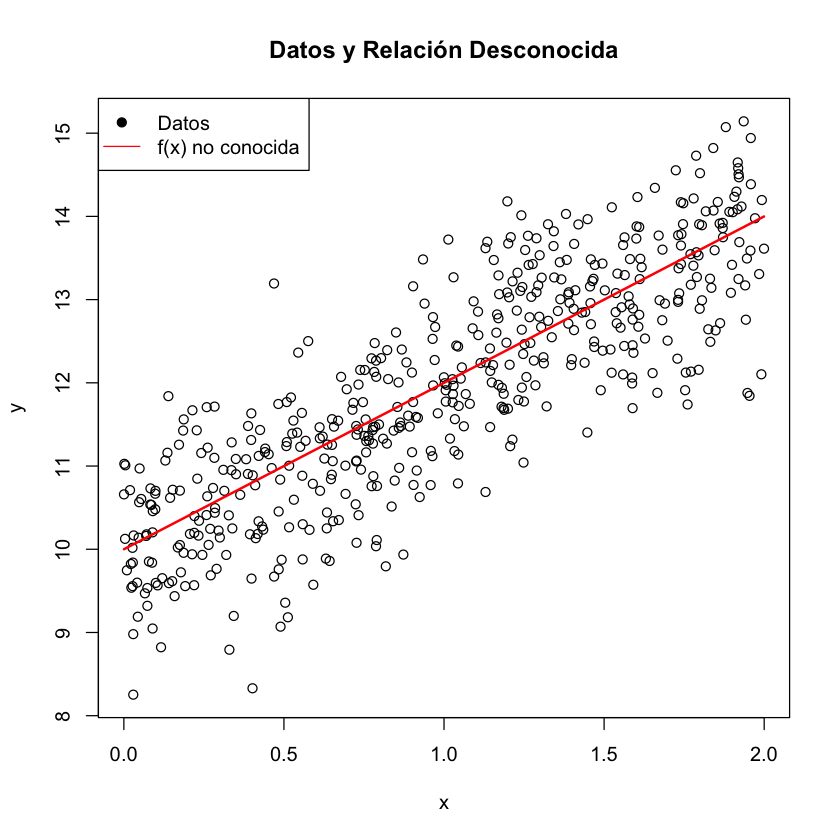

In [7]:
#Creemos el conjunto de datos
set.seed(081125)
n = 500
x = sort(runif(n, min = 0, max = 2))
fx = 10 + 2*x
y = fx + rnorm(n, sd=0.8)
datos <- as.data.frame(cbind(y, x))

plot(x, y, main = "Datos y Relación Desconocida")
lines(x, fx, col = "red", lwd=2)
legend(x = "topleft", legend=c("Datos", "f(x) no conocida"), col = c("black", "red"), pch = c(19,NA), lty = c(NA, 1))

El econometrista decide usar el siguiente modelo para estudiar la relación entre $x$ y $y$:

$$y_i = \beta_0 + \beta_1 x_i + u_i$$

A continuación presentamos la estimación de este modelo a partir del método de mínimos cuadrados ordinarios (MCO):

In [8]:
model <- lm(y ~ x, data = datos)

#Coeficiente b0
b0 <- model$coefficients[1]
#Coeficiente b1
b1 <- model$coefficients[2]
print(paste0('Estimaciones de MCO: ', 'b0 = ', round(b0, 3), ' , b1 = ', round(b1, 3)))

#Prediccion
model_fit <- as.data.frame(predict(model, se.fit = TRUE, , interval = "confidence",  data = datos, level = 0.99))
names(model_fit) <- c('yhat', 'lwr', 'upr', 'se', 'df', 'residuals')
head(model_fit, 5)

[1] "Estimaciones de MCO: b0 = 9.915 , b1 = 2.019"


,yhat,lwr,upr,se,df,residuals
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,9.915539,9.744649,10.08643,0.06608924,498,0.7483613
2,9.917544,9.746783,10.08831,0.06603975,498,0.7483613
3,9.922188,9.751723,10.09265,0.06592522,498,0.7483613
4,9.923880,9.753523,10.09424,0.06588350,498,0.7483613
5,9.933702,9.763970,10.10343,0.06564151,498,0.7483613


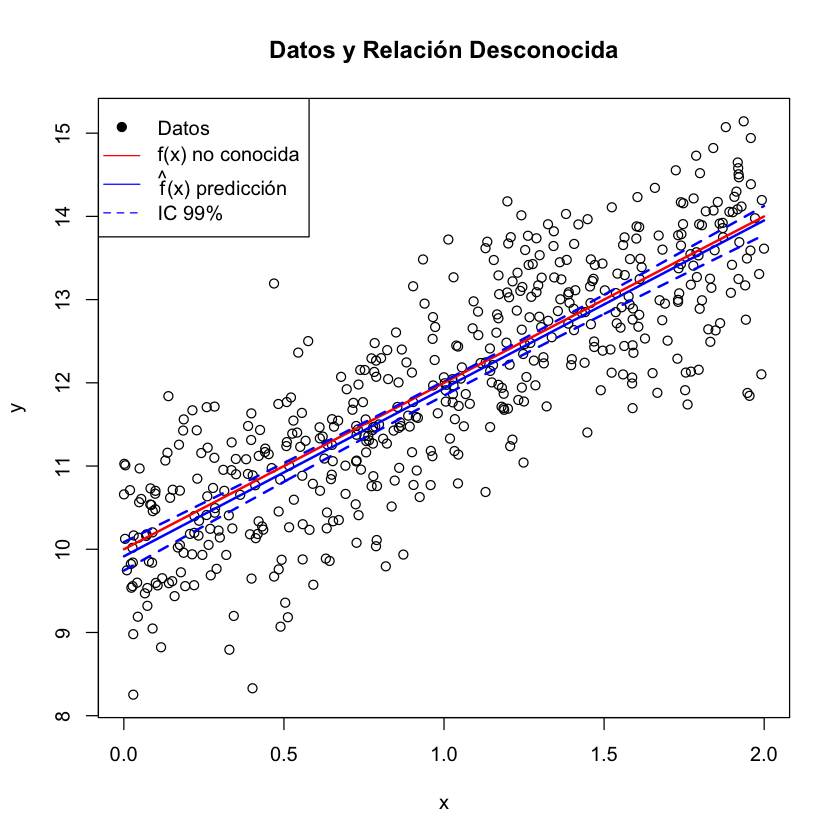

In [9]:
plot(x, y, main = "Datos y Relación Desconocida")
lines(x, fx, col = "red", lwd=2)
#Prediccion
lines(x, model_fit$yhat, col = "blue", lwd=2, lty = 1)
#Intervalos de Confianza
lines(x, model_fit$lwr, col = "blue", lwd=2, lty = 2)
lines(x, model_fit$upr, col = "blue", lwd=2, lty = 2)
legend(x = "topleft", legend=c("Datos", "f(x) no conocida", expression(paste(hat(f), "(x) predicción")), "IC 99%"), 
       col = c("black", "red", "blue", "blue"), pch = c(19,NA,NA,NA), lty = c(NA, 1, 1, 2))

In [10]:
#Tabla de Regresion
summary(model)


Call:
lm(formula = y ~ x, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.39622 -0.48219  0.02633  0.51500  2.33202 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.91466    0.06611  149.97   <2e-16 ***
x            2.01859    0.05777   34.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7484 on 498 degrees of freedom
Multiple R-squared:  0.7103,	Adjusted R-squared:  0.7097 
F-statistic:  1221 on 1 and 498 DF,  p-value: < 2.2e-16


Observe que las estimaciones del modelo aproximan bastante bien la función desconocida:

$$\hat\beta_0 = 9.915 \hspace{5pt} \text{ y } \hspace{5pt} \beta_0 = 10$$

$$\hat\beta_1 = 2.019 \hspace{5pt} \text{ y } \hspace{5pt} \beta_1 = 2$$

Más aún, el intervalo de confianza de nuestras estimaciones $\hat f(x_i)$ incluye el verdadero valor de $f(x)$. 

Sin embargo, note que usamos un modelo lineal para estimar una funcion desconocida lineal. Luego, **no es tan sorprendete el buen desempeño de nuestro modelo**.

¿Qué pasa si usamos un modelo lineal para estimar una función no lineal?

Suponga ahora que 

$$y = f(x) = \cos(2 \pi x)$$

Nuevamente, el econometrista observa $\{x_i, y_i\}_{i = 1}^n$ con 

$$y_i = f(x_i) + \varepsilon_i, \text{ donde } \varepsilon_i \sim N(0, 0.64)$$

El modelo que el econometrista decide usar tiene la siguiente forma funcional:

$$y_i = \sum_{j = 0}^k \beta_j x_i^j = \beta_0 + \beta_1 x_i + ... + \beta_k x_i^k$$

Es decir, vamos a usar un modelo lineal (en parámetros) para tratar de aproximar una función no lineal.

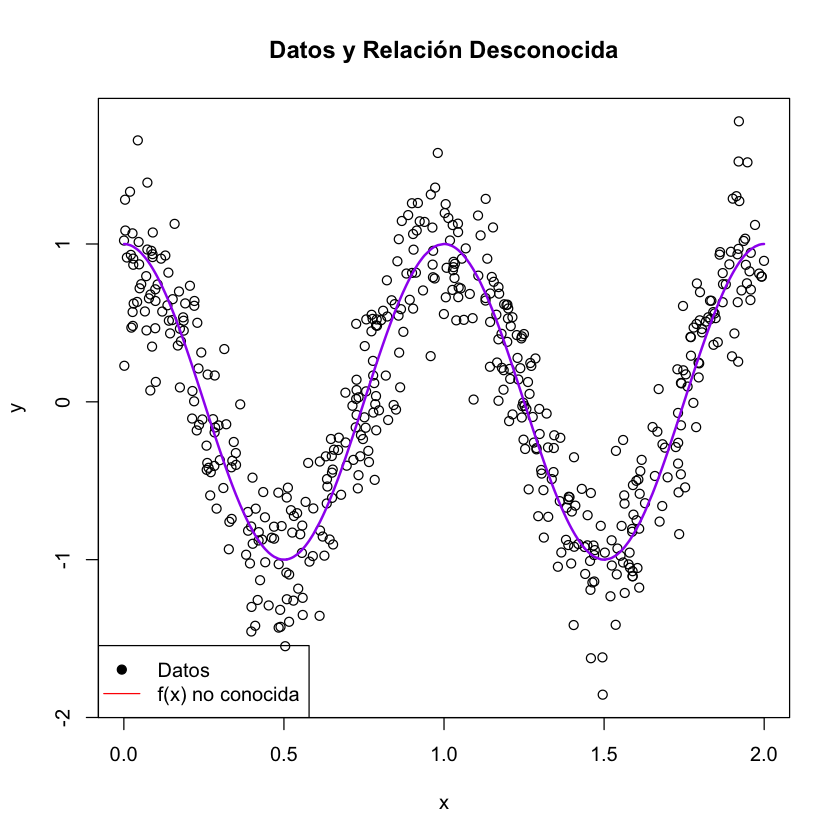

In [11]:
fx = cos(2*pi*x) 
y = fx + rnorm(500, sd=0.3)

plot(x, y, main = "Datos y Relación Desconocida")
lines(x, fx, col = "purple", lwd=2)
legend(x = "bottomleft", legend=c("Datos", "f(x) no conocida"), col = c("black", "red"), pch = c(19,NA), lty = c(NA, 1))

Observe que cuando el grado del polinomio incrementa, nuestro modelo ajusta mejor los datos y la función desconocida.

<div class="alert alert-block alert-danger"> 
<b>Nota:</b>
<p>

Luego veremos que es importante estimar modelos simples o *parsimoniosos*.
    
En nuestro ejemplo, el modelo es más complejo cuando incrementamos el orden del polinomio. La teoría económica usualmente nos guia para seleccionar el grado del polinomio.

</div>

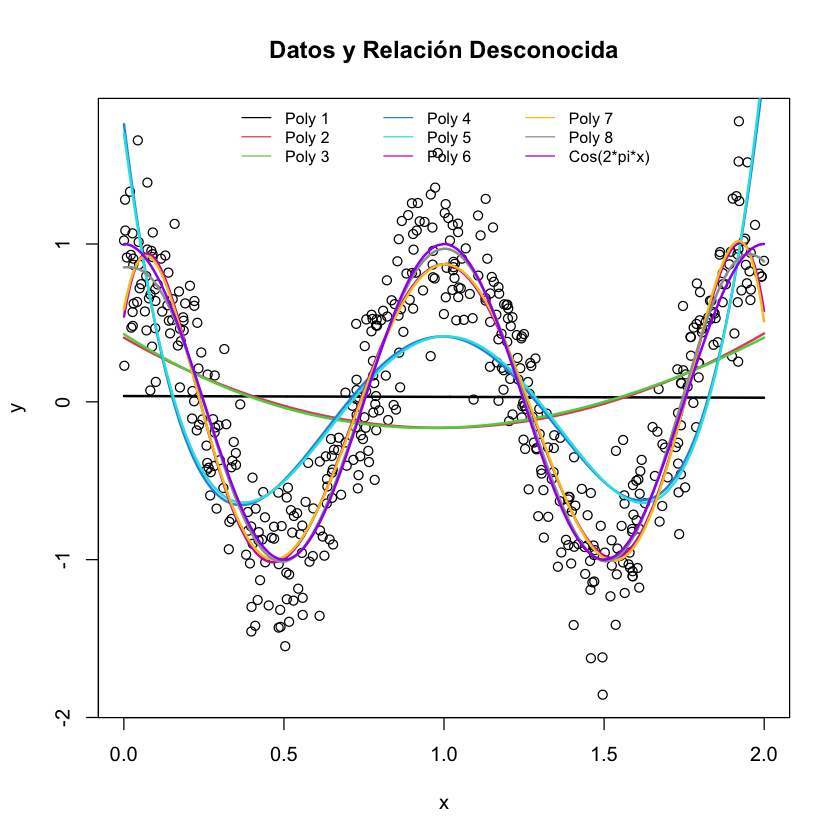

In [12]:
plot(x, y, main = "Datos y Relación Desconocida")
legend <- length(8)
for(degree in 1:8){
  fm = lm(y~poly(x, degree))
  lines(x,predict(fm), col=degree, lwd=2)
  legend[degree] <- paste0("Poly ", degree)
}

lines(x, fx, col = "purple", lwd=2)
legend("top", c(legend, "Cos(2*pi*x)"), lwd=1, col=c(1:8, "purple"), ncol=3, bty="n",cex=0.8, pt.cex=0.8)

## 1.4 Fundamentos de Probabilidad

La probabilidad es un lenguaje matemático para cuantificar la incertidumbre. En este documento presentamos conceptos básicos de probabilidad que son importantes para nuestro curso.

### 1.4.1 Espacio Muestral y Eventos

El **espacio muestral** $\Omega$ es el conjunto de todos los posibles resultados de un experimento aleatorio. 

Los elementos $\omega \in \Omega$ se concen como **realizaciones** o resultados muestrales. 

Los subconjuntos de $\Omega$ se conocen como **eventos**.


<div class="alert alert-block alert-warning"> 
<b>EJEMPLO:</b>
<p>

Se lanza una moneda justa al aire dos veces. Solo hay dos posibles realizaciones en cada lanzamiento: $C$ ó $S$. En este caso 
    
$$\Omega = \{(C,C),(C,S),(S,C),(S,S) \}$$

</div>

### 1.4.2 Medida de Probabilidad

Una <b>medida de probabilidad</b> es una función $\mathbb{P} : \Omega \rightarrow [0, 1]$ tal que:

1. $\mathbb{P}(A) \geq 0$, $\forall A \subseteq \Omega$
2. $\mathbb{P}(\Omega) = 1$
3. Si $A_1$, $A_2$, ... son subconjuntos disjuntos de $\Omega$, entonces 

$$\mathbb{P}\left(\bigcup^{\infty}_{i=1} A_i \right) = \sum_{i = 1}^\infty \mathbb{P}(A_i)$$


En el ejemplo anterior:

| $ \omega \in \Omega $ | $\mathbb{P}(\{\omega\})$ |
| --- | --- |
| (S, S) | 1/4 |
| (S, C) | 1/4 |
| (C, S) | 1/4 |
| (C, C) | 1/4 |

### 1.4.3 Propiedades de Probabilidad

Muchas propiedades de $\mathbb{P}$ se pueden derivar a partir de los axiomas. En particular,

1. $\mathbb{P}(\emptyset) = 0$
2. $A \subset B \Rightarrow \mathbb{P}(A) \leq \mathbb{P}(B)$
3. $0 \leq \mathbb{P}(A) \leq 1$
4. $\mathbb{P}(A^c) = 1 - \mathbb{P}(A)$

Una propiedad menos obvia está dada por el siguiente lema

<div class="alert alert-block alert-info">
<b>LEMA:</b>
<p>
    
Para todo evento $A$ y $B$, 

$$\mathbb{P}\left(A \cup B \right) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}\left(A \cap B \right)$$
</div>

### 1.4.4 Eventos Independientes

Dos eventos $A$ y $B$ son independientes si y solo si 

$$\mathbb{P}\left(A \cap B \right) = \mathbb{P}(A) \cdot \mathbb{P}(B)$$

<div class="alert alert-block alert-warning"> 
<b>EJEMPLO:</b>
<p> 
    
¿Cuál es la probabilidad de obtener $S$ en el primer lanzamiento y $C$ en el segundo lanzamiento de una moneda justa?

$$\mathbb{P}(S \cap C) = \mathbb{P}(S) \cdot \mathbb{P}(C) = 1/2 \cdot 1/2 = 1/4$$

Los lanzamientos de una moneda justa son independientes

</div>

Observe que si $A$ y $B$ son eventos disjuntos con probabilidades positivas, estos no son independientes. Note que 

$$\mathbb{P}\left(A \cap B \right) = \mathbb{P}(\emptyset) = 0$$

$$\mathbb{P}(A) \cdot \mathbb{P}(B) > 0$$


### 1.4.5 Probabilidad Condicional

Si $\mathbb{P}(B) > 0$ entonces la **probabilidad condicional** de $A$ dado $B$ está dada por 

$$\mathbb{P}(A | B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)}$$

<div class="alert alert-block alert-warning"> 
<b>EJEMPLO:</b>
<p> 
    
¿Cuál es la probabilidad de obtener $S$ en el segundo lanzamiento de una moneda justa dado que en el primer lanzamiento obtuve $C$?

$$\mathbb{P}(S | C) = \frac{\mathbb{P}(S , C)}{\mathbb{P}(C)} = \frac{\mathbb{P}(S) \cdot \mathbb{P}(C)}{\mathbb{P}(C)} = \frac{1/2 \cdot 1/2}{1/2} = 1/2 = P(S)$$

La realización del primer lanzamiento no ofrece información relevante para el resultado del segundo lanzamiento. Es decir, los eventos son independientes.
</div>

<div class="alert alert-block alert-info">
<b>LEMA:</b>
<p>
    
Si $A$ y $B$ son independientes, entonces $\mathbb{P}(A | B) = \mathbb{P}(A)$. 

Además, para cualquier pareja de eventos $A$ y $B$ con probabilidad positiva, se tiene que 
    
$$\mathbb{P}(A \cap B) = \mathbb{P}(A | B) \cdot \mathbb{P}(B) = \mathbb{P}(B | A) \cdot \mathbb{P}(A)$$
</div>

### 1.4.6 Teorema de Bayes

<div class="alert alert-block alert-info">
<b>TEOREMA (Ley de Probabilidad Total):</b>
<p>
    
Sea $A_1, ..., A_k$ una partición de $\Omega$. Así, para todo evento $B$,

$$\mathbb{P}(B) = \sum_{i = 1}^k \mathbb{P}(B|A_i) \mathbb{P}(A_i)$$
</div>

<div class="alert alert-block alert-info">
<b>TEOREMA (Teorema de Bayes):</b>
<p>
    
Sea $A_1, ..., A_k$ una partición de $\Omega$ tal que $\mathbb{P}(A_i) > 0$ para todo $i$. Si $\mathbb{P}(B) > 0$, entonces para todo $i \in \{1, ..., k\}$

$$\mathbb{P}(A_i | B) = \frac{\mathbb{P}(B|A_i)\cdot \mathbb{P}(A_i)}{\sum_j \mathbb{P}(B|A_j) \mathbb{P}(A_j)}$$
</div>

### 1.4.7 Variables Aleatorias

La econometría hace uso de datos para analizar problemas económicos. Cuál es la relación entre los espacios muestrales y los eventos y los datos? El concepto clave es el de variable aleatoria.

Una **variable aleatoria** es un mapeo que asigna un valor real $X(\omega)$ a cada realización $\omega$, es decir, 

$$X : \Omega \rightarrow \mathbb{R}$$

<div class="alert alert-block alert-warning"> 
<b>EJEMPLO:</b>
<p>

Sea $X$ el número de veces que se obtiene $S$ al lanzar una moneda justa dos veces al aire.
</div>

Del ejemplo anterior podemos deducir que

| $\omega \in \Omega$ | $X(\omega)$ | $\mathbb{P}(\{\omega\})$ |
| --- | --- | --- |
| (S, S) | 2 | 1/4 |
| (S, C) | 1 | 1/4 |
| (C, S) | 1 | 1/4 |
| (C, C) | 0 | 1/4 |

Note que al tomar solo las dos últimas columnas obtenemos la **distribución de probabilidad** de $X$

| $x$ | $\mathbb{P}(X = x)$ |
| --- | --- |
| 2 | 1/4 |
| 1 | 1/2 |
| 0 | 1/4 |


### 1.4.8 Funciones de Distribución

La **función de distribución acumulada** (FDA) es una función $F_X : \mathbb{R} \rightarrow [0, 1]$ que se define como 

$$F_X(x) = P(X \leq x)$$

<div class="alert alert-block alert-warning"> 
<b>EJEMPLO:</b>
<p>

Para el ejemplo anterior, la FDA de $X$ esta dada por

\begin{equation*}
F_X(x) =
    \left\{\begin{array}{lr}
    0, & x < 0 \\
    1/4, & 0 \le x < 1 \\
    3/4, & 1 \le x < 2 \\    
    1, & x \geq 2
    \end{array}\right.
\end{equation*}

Note que esta función es continua por derecha, no-decreciente, y está definida para todo $x$ en los reales, a pesar de que la variable solo toma valores 0, 1, y 2. Es por esto que $F_X(1.4) = 3/4$
</div>

Una variable aleatoria $X$ es **discreta** si toma valores contables $\{x_1, x_2\}$. Definimos la distribución de probabilidad de $X$ como 

$$f_X(x) = P(X = x)$$

Dos propiedades de esta función son:

$$f_X(x) \geq 0, \forall x \in \mathbb{R}$$

$$\sum_i f_X(x_i) = 1$$

La FDA de $X$ se relaciona con $f_X$ así: 

$$F_X(x) = P(X \leq x) = \sum_{x_i \leq x} f_X(x_i)$$


<div class="alert alert-block alert-warning"> 
<b>EJEMPLO:</b>
<p>

Para nuesto ejemplo, la distribución de probabilidad de $X$ esta dada por

\begin{equation*}
f_X(x) =
    \left\{\begin{array}{lr}
    1/4, & x = 0 \\
    1/2, & x = 1 \\
    1/4, & x = 2 \\    
    0, & \text{otro caso}
    \end{array}\right.
\end{equation*}

</div>

Una variable $X$ es **continua** si existe una funcion $f_X$ tal que 

1. $f_X(x) \geq 0$ para todo $x \in \mathbb{R}$
2. $\int_{-\infty}^{\infty} f_X(x) dx = 1$
3. Para todo $a \leq b$ se tiene que 

$$\mathbb{P}(a\leq X \leq b) = \int_a^b f_X(x) dx$$

$f_X$ se conoce como la **función de densidad** de $X$. Note además que 

$$F_X(x) = F(X \leq x) = \int_{-\infty}^x f_X(t) dt$$

Por lo tanto, 

$$f_X(x) = F'_X(x) = \frac{\partial F_X}{\partial x}$$

<div class="alert alert-block alert-warning"> 
<b>EJEMPLO:</b>
<p>

Suponga que $X$ tiene una función de densidad dada por

\begin{equation*}
f_X(x) =
    \left\{\begin{array}{lr}
    1, & 0 \leq x \leq 1 \\
    0, & \text{otro caso}
    \end{array}\right.
\end{equation*}

Note que $f_X(x) \geq 0$ y $\int_{-\infty}^{\infty} f_X(x) dx = 1$. Finalmente observe que

\begin{equation*}
F_X(x) =
    \left\{\begin{array}{lr}
    0, & x < 0 \\
    x, & 0 \leq x \leq 1 \\
    1, & x > 1
    \end{array}\right.
\end{equation*}
</div>


### 1.4.9 Propiedades de $F_X$

Para una variable aleatoria $X$, algunas propiedades de $F_X$ son:

$$\mathbb{P}(X = x) = F(x) - F(x^-), \text{ donde } F(x^-) = \lim_{y\uparrow x} F(y)$$

$$\mathbb{P}(x < X \leq y) = F(y) - F(x)$$

$$\mathbb{P}(X > x) = 1 - F(x)$$

Si $X$ es continua, entonces 
   
\begin{align*}
    F(b) -  F(a) & = \mathbb{P}(a < X < b) =  \mathbb{P}(a \leq X < b)\\
     & = \mathbb{P}(a < X \leq b) =  \mathbb{P}(a \leq X \leq b)
\end{align*}

### 1.4.10 Función Inversa (o de Cuantiles) de $F_X$

La inversa de $F_X$ está definida por 

$$F^{-1}(q) = \inf \left\{x : F(x) > q \right\}$$

para todo $q \in [0, 1]$. 

Note que si $F$ es estrictamente creciente y continua, entonces $F^{-1}(q)$ es el unico valor real $x$ tal que $F(x) = q$

### 1.4.11 Algunas Variables Discretas Importantes

**Bernoulli**. Si $X$ es una variable aleatoria que toma valores binarios tal que $\mathbb{P}(X = 1) = p$ y $\mathbb{P}(X = 0) = 1-p$, para algún $p \in [0, 1]$, decimos que $X \sim$ Bernoulli($p$). La función de distribución está dada por $f(x) = p^x (1- p)^{1-x}$ para $x \in \{0, 1\}$.


<div class="alert alert-block alert-warning"> 
<b>EJEMPLO:</b>
<p>

Definamos $X$ como sacar $S$ en el lanzamiento de una moneda justa. Entonces, $X(S) = 1$, $X(C) = 0$ y $p = 1/2$. 

Note que 

$$f(X = 1) = \mathbb{P}(S) = (1/2)^1 (1-1/2)^{1-1} = 1/2$$ 

$$f(X = 0) = \mathbb{P}(C) = (1/2)^0 (1-1/2)^{1-0} = 1/2$$
    
</div>

**Binomial**. Suponga que tenemos una moneda con probabilidad $p \in [0, 1]$ de caer en $S$. Sea $X$ la variable que cuenta el número de veces que la moneda cae en $S$ en $n$ lanzamientos. La función de distribución está dada por 

\begin{equation*}
f(x) =
    \left\{\begin{array}{lr}
    {n \choose x} p^x (1- p)^{1-x} & \text{ para } x = 0, 1, ..., n \\
    0 & \text{en cualquier otro caso}
    \end{array}\right.
\end{equation*}

En este caso decimos que $X \sim$ Binomial($n, p$). 

<div class="alert alert-block alert-info">
<b>TEOREMA:</b>
<p>
    
si $X_1 \sim$ Binomial($n_1, p$) y $X_2 \sim$ Binomial($n_2, p$), entonces 

$$X_1 + X_2 \sim \text{Binomial(} n_1 + n_2, p \text{)}.$$
</div>

**Geométrica**. $X$ tiene una distribución geométrica con parámetro $p$ si 

$$f(x) = P(X = k) = p(1-p)^{k-1}, \text{ con } k \geq 1.$$

Se puede pensar en $X$ como el número de veces que se requiren para obtener el primer $S$ cuando se lanza una moneda justa.

**Poisson**. $X$ tiene distribución poisson con parámetro $\lambda$ si 

$$f(x) = e^{-\lambda}\frac{\lambda^x}{x!}, \text{ con } x \geq 0.$$

### 1.4.12 Algunas Variables Continuas Importantes

**Uniforme**. $X$ tiene distribución uniforme con parámetros $a < b$ si

\begin{equation*}
f(x) =
    \left\{\begin{array}{lr}
    \frac{1}{b-a} & \text{ para } x \in [a, b] \\
    0 & \text{en cualquier otro caso}
    \end{array}\right.
\end{equation*}

Decimos entonces que $X \sim U(a, b)$

**Normal (o Gausiana)**. $X$ tiene distribución normal con parámetros $\mu \in \mathbb{R}$ y $\sigma > 0$, si 

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left\{ - \frac{1}{2\sigma^2} (x - \mu)^2 \right\} , \text{ para } x \in \mathbb{R}$$

Decimos entonces que $X \sim N(\mu, \sigma^2)$.

El parámetro $\mu$ es el centro (o media) de la distribución y $\sigma$ es la disperción (o desviación estandar).

Decimos que $Z$ se distribuye **normal estandar** si $\mu = 0$ y $\sigma = 1$, en cuyo caso la distribución se denota por $\phi(z)$ y la FDA por $\Phi(z)$.

Algunas propiedades útiles para variables con distribución normal son:

Si $X \sim N(\mu, \sigma^2)$, entonces $Z = \frac{X - \mu}{\sigma} \sim N(0, 1)$

Si $Z \sim N(0, 1)$, entonces $X = \mu + \sigma Z \sim N(\mu, \sigma^2)$

Si $X \sim N(\mu, \sigma^2)$, entonces $Y = a X + b \sim N(a \mu + b, a^2 \sigma^2)$

Si $X_i \sim N(\mu_i, \sigma_i)$, $i = 1, ..., n$ son variables independientes, entonces 

$$\sum_{i=1}^{n} X_i \sim N\left(\sum_{i=1}^{n} \mu_i, \sum_{i=1}^{n} \sigma^2_i \right)$$

Si $X \sim N(\mu, \sigma^2)$, entonces 

\begin{align*}
    \mathbb{P}(a < X < b) & = \mathbb{P} \left( \frac{a - \mu}{\sigma} < Z < \frac{b - \mu}{\sigma} \right)\\
     & = \Phi \left(\frac{b - \mu}{\sigma} \right) - \Phi \left(\frac{a - \mu}{\sigma} \right)
\end{align*}

Ciertas transformaciones de una variable normal dan como resultado otro tipo de distribuciónes. 

Decimos que $X \sim \chi_n^2$ si 

$$X = \sum_{i = 1}^n Z_i^2$$

donde $Z_i \sim N(0, 1)$ son $n$ variables aleatorias independientes$^*$ y $n$ representa los grados de libertad.

$^*$veremos el concepto de independencia más adelante

Decimos que $X \sim t_{n}$ si 

$$X = \frac{Z}{\sqrt{\frac{Y}{n}}}, \text{ donde } Y \sim \chi_n^2$$

Decimos que $X \sim F_{n_1, n_2}$ si

$$X = \frac{Y_1/n_1}{Y_2/n_2}, \text{ donde } Y_1 \sim \chi^2_{n_1} \text{ y } Y_2 \sim \chi^2_{n_2}$$


### 1.4.13 Distribuciones Bivariadas

Para dos variables aleatorias discretas $X$ y $Y$ la **distribución de probabilidad conjunta** está dada por $f(x, y)= \mathbb{P}(X = x, Y = y)$ 

La **distribución marginal** de $X$ está dada por 

$$\mathbb{P}(X = x) = \sum_y \mathbb{P}(X = x, Y = y)$$

Supongan que $X \in \{0, 1\}$ y $Y \in \{1, 2, 3\}$ con probabilidad conjunta dada por la siguiente tabla:

| $(X \backslash Y)$ | 1     | 2     | 3     | $\mathbb{P}(X = x)$ |
|--------------------|-------|-------|-------|-----------|
| 0                  | 1/9   | 2/9   | 0     | 3/9       |
| 1                  | 2/9   | 3/9   | 1/9   | 6/9       |
| $\mathbb{P}(Y = y)$| 3/9   | 5/9   | 1/9   | 1         |


Observe que $\mathbb{P}(X = 1, Y = 2) = 3/9$

En el caso continuo, una función $f(x, y)$ es una distribución de densidad si

(1) $f(x, y) > 0$ para todo $(x, y)$

(2) $\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) dx dy= 1$

(3) para todo conjunto $A \subset \mathbb{R} \times \mathbb{R}$,

$$\mathbb{P}((X, Y) \in A) = \int\int_A f(x, y) dx dy$$

La **densidad marginal** $X$ está dada por 

$$f_X(x) = \int f(x, y) dy$$

En ambos casos definimos la distribución conjunta acumulada como $F_{X, Y}(x, y) = P(X \leq x, Y \leq y)$

### 1.4.14 Distribución Condicional

En el caso discreto, la **distribución condicional** de $X$ dado $Y = y$ está dada por

$$\mathbb{P}(X = x| Y = y) = \frac{\mathbb{P}(X = x, Y = y)}{\mathbb{P}(Y = y)}$$

En el caso continuo, la **densidad condicional** de $X$ y $Y$ es una función $f_{X|Y}(x|y)$ tal que

$$f_{X|Y}(x|y) = \frac{f_{X,Y}(x, y)}{f_Y(y)}, \text{ si } f_Y(y) > 0$$ 

Además, tenemos que

$$\mathbb{P}(X \in A | Y = y) = \int_A f_{X|Y}(x|y) dx$$

### 1.4.15 Distribuciones Multivariadas

Sean $X_1, ..., X_n$ variables aleatorias. Definimos el **vector aleatorio** $X = (X_1, ..., X_n)$, cuya distribución o **función de densidad multivariada** está dada por $f(x_1, ..., x_n)$.

Decimos que $X_1, ..., X_n$ son independientes si para todo $A_1, ..., A_n$

$$P(X_1 \in A_1, ...,  X_n \in A_n) = \prod_{n=1}^{n} P(X_i \in A_i)$$

Sin embargo, es suficiente mostrar que $f(x_1, ..., x_n) = \prod_{n=1}^{n} f_{X_i}(x_i)$. Donde $f_{X_i}(x_i)$ es la **distribución margina**l de $X_i$

Si $X_1, ..., X_n$ son independientes y cada una tiene la misma distribución marginal, entonces decimos que son iid (**independientes e identicamente distribuidas**)

### 1.4.16 Esperanza Matemática

El **valor esperado**, **media**, o **primer momento** de una variable aleatoria $X$ se define como

\begin{equation*}
E(X) =
    \left\{\begin{array}{lr}
    \sum_x x \cdot \mathbb{P}(X = x) & \text{ si } X \text{ es discreta } \\
    \int x f(x) dx, & \text{ si } X \text{ es continua }
    \end{array}\right.
\end{equation*}

Observe que si $X$ y $Y$ son variables aleatorias, entonces para todo $a \in \mathbb{R}$ y $b \in \mathbb{R}$ se tiene que:

$$E(X + Y) = E(X) + E(Y)$$

$$E(aX + b) = aE(X) + b$$

Más aún, si $X$ y $Y$ son independientes, entonces:

$$E \left(X \cdot Y \right) = E(X) \cdot E(Y)$$

### 1.4.17 Varianza

Para una variable $X$ con media $\mu$, su **varianza** se define como:

$$V(X) = E(X- \mu)^2 = \sigma^2$$

La **desviación estandar** de $X$ es $\sigma = \sqrt{V(X)}$

Observe que:

1. $V(X) = E(X^2) - \mu^2$

2. Si $a \in \mathbb{R}$ y $b \in \mathbb{R}$, entonces $V(aX + b) = a^2 V(X)$

3. Si $X$ y $Y$ son independientes, entonces $V(X + Y) = V(X) + V(Y)$

### 1.4.18 Covarianza

La **covarianza** entre $X$ y $Y$ se define como

$$Cov(X, Y) = E \left((X - \mu_X) (Y - \mu_Y) \right)$$

y el **coeficiente de correlación** está dado por 

$$\rho(X, Y) = \frac{Cov(X , Y)}{\sigma_X \cdot \sigma_Y}$$

Observe que 

$$Cov(X, Y) = E(X \cdot Y) - E(X) \cdot E(Y)$$

$$-1 \leq \rho(X, Y) \leq 1$$

Finalmente, note que

$$V(X + Y) = V(X) + V(Y) + 2 \cdot Cov(X, Y)$$

$$V(X - Y) = V(X) + V(Y) - 2 \cdot Cov(X, Y)$$

### 1.4.19 Esperanza Condicional

La **esperanza condicional** de $X$ dado $Y = y$ está dada por

\begin{equation*}
E(X | Y = y) =
    \left\{\begin{array}{lr}
    \sum_x x \cdot \mathbb{P}(X = x | Y = y) & \text{en el caso discreto} \\
    \int x f(x|y) dx, & \text{en el caso continuo}
    \end{array}\right.
\end{equation*}

<div class="alert alert-block alert-info">
<b>TEOREMA (Ley de Esperanzas Iteradas):</b>
<p>

Para dos variables aleatorias $X$ y $Y$, si existen sus esperanzas, entonces
  
$$E(E(X | Y)) = E(X)$$
</div>

**Demostración**. Usando la definición de esperanza condicional y el hecho que $f(x,y) = f(x|y) f(y)$ tenemos que

\begin{align*}
    E(E(X|Y)) & = \int E(X | Y = y) f_Y(y) dy = \int\int x f(x|y) dx f(y) dy \\
     & = \int\int x f(x|y) f(y) dy dx = \int\int x f(x,y) dy dx \\
     & = \int x \left( \int f(x, y) dy \right) dx = \int x f(x) dx = E(X)
\end{align*}

## 1.5 Fundamentos de Estadística

El objetivo fundamental de la estadística es proveer conclusiones respecto a una **población** determinada a partir de **muestras**.

### 1.5.1 Estimación Puntual

Una estimación puntual es el "mejor pronóstico" sobre algún valor de interés. La cantidad de interés puede ser el parámetro de un modelo, una distribución acumulada $F$, una distribución de probabilidad $f$, una función de regression $r(x)$, o la predicción del valor futuro de una variable $Y$.

Por convención, $\theta$ representa un parámetro fijo desconocido y $\hat\theta_n$ representa su estimación puntual. Es importante notar que $\hat\theta_n$ depende de los datos y por lo tanto es una variable aleatoria.

Observe que una estimación puntual se obtiene a partir de una función $T(X_1, ..., X_n)$, conocida como  **estimador** o **estadístico**. Dicha función depende de los valores de una muestra aleatoria $\{X_1, ..., X_n\}$ para calcular el valor puntual:

$$\hat\theta_n = T(X_1, ..., X_n)$$

### 1.5.2 Momentos Muestrales

Sea $X_1, ..., X_n$ una muestra aleatoria de tamaño $n$, entonces definimos la **media muestral** como:

$$\bar{X_n} = \frac{1}{n} \sum_{i = 1}^n X_i$$

La **varianza muestral** está definida por:

$$S_n^2 = \frac{1}{n-1} \sum_{i = 1}^n (X - \bar{X_n})^2$$

<div class="alert alert-block alert-info">
<b>TEOREMA:</b>
<p>
    
Si $X_1, ..., X_n$ son iid, entonces

$$E(\bar{X_n}) = \mu, \hspace{10pt} V(\bar{X_n}) = \frac{\sigma^2}{n}, \hspace{5pt} \text{y} \hspace{5pt} E(S_n^2) = \sigma^2$$

donde $E(X_i) = \mu$ y $V(X_i) = \sigma^2$ para todo $i = 1, ..., n$.
</div>

### 1.5.3 Propiedades de los Estimadores

Decimos que un estimador es **insesgado** si 

$$E(\hat\theta_n) = \theta$$

Podemoslos definir también el sesgo de un estimador como 

$$\texttt{bias}(\hat\theta_n) = E(\hat\theta_n) - \theta$$

Un requisito razonable para un estimador es que converga al valor del parámetro de interés si aumentamos el tamaño muestral.

La distribución de $\hat\theta_n$ se conoce como **distribución muestral** y la desviación estandar de $\hat\theta_n$ se llama **error estándar** y se denota por $\texttt{se}$

$$\texttt{se} = \sqrt{V(\hat\theta_n)}$$

Comunmente, desconocemos la distribución muestral y, por lo tanto, $\texttt{se}$ es desconocido. Sin embargo, es usual que podamos estimar el error estandar. A esta estimación la denotamos por $\hat{\texttt{se}}$

Un estimador insesgado $\hat\theta_1$ es más **eficiente** que otro estimador insesgado $\hat\theta_2$ si

$$V(\hat\theta_1) < V(\hat\theta_2)$$

Para evaluar la calidad del una estimación puntual algunas veces usamos el **error cuadrático medio**, o $\text{MSE}$, que se define como

$$\text{MSE} = E_\theta (\hat\theta_n - \theta)^2 = \texttt{bias}^2(\hat\theta_n) + V_\theta(\hat\theta_n)$$

### 1.5.4 Ley de los Grandes Números

Una secuencia de variables aleatorias $\{X_n\}$ **converge en probabilidad** a una constante $c$ si

$$\lim_{n \to \infty} \mathbb{P}(|X_n - c| > \epsilon) = 0, \text{ para } \epsilon > 0$$

Para abreviar decimos que $X_n \overset{p}{\to} c$

<div class="alert alert-block alert-info">
<b>Ley de los Grandes Números:</b>
<p>

Sea una $\{X_i\}_{i = 1}^n$ una secuencia de variables iid tal que $E(X_i) = \mu < \infty$, entonces 

$$ \frac{1}{n} \sum_{i = 1}^n X_i = \bar{X_n} \overset{p}{\to} \mu$$
</div>

### 1.5.5 Teorema del Limite Central

El resultado anterior es muy poderoso. Otro resultado fundamental en estadística y en econometría es el teorema del límite central 

<div class="alert alert-block alert-info">
<b>TEOREMA:</b>
<p>

Sea una $\{X_i\}_{i = 1}^n$ una secuencia de variables iid tal que $E(X_i) = \mu < \infty$ y $V(X_i) = \sigma^2 < \infty$. Definamos 

$$Z_n = \frac{\sum_{i = 1}^n X_i - n\mu}{\sigma \sqrt n} = \frac{\bar X - \mu}{\sigma/\sqrt n}$$

Entonces la función de distribución de $Z_n$ converge hacia la función de distribución de una variable normal estandar cuando $n \to \infty$, es decir, 

$$\lim_{n \to \infty} P(Z_n \leq z) = \Phi(z) = \int_\infty^z \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx$$

</div>

Decimos entonces que un estimador puntual es **consistente** si 

$$\hat\theta_n \overset{p}{\to} \theta$$

Un estimador es **asintóticamente normal** si 

$$\frac{\hat\theta_n - \theta}{\texttt{se}} \to N(0, 1)$$

<div class="alert alert-block alert-info">
<b>TEOREMA:</b>
<p>

Si $\texttt{bias} \overset{n \to \infty}{\longrightarrow} 0$ y $\texttt{se} \overset{n \to \infty}{\longrightarrow} 0$, entonces $\hat\theta_n$ es consistente. Es decir, $\hat\theta_n \overset{p}{\to} \theta$
</div>

### 1.5.6 Intervalos de Confianza

Un **intervalo de confianza** a un nivel del $1 - \alpha$ para un parámetro $\theta$ es un conjunto $C_n = (a, b)$ donde $a = a(X_1, ... , X_n)$ y $b = b(X_1, ..., X_n)$ son funciones de los datos tal que

$$\mathbb{P}_\theta (\theta \in C_n) \geq 1 − \alpha, \text{ para todo } \theta \in \Theta$$

En otras palabras, $(a, b)$ contiene a $\theta$ con probabilidad $1 - \alpha$. La tasa de **convergencia** del intervalo es $1 - \alpha$.

<div class="alert alert-block alert-info">
<b>TEOREMA:</b>
<p>

Suponga que $\hat\theta_n \sim N (\theta, \texttt{se}^2)$. Sea $Z \sim N(0, 1)$, $\Phi$ su distribución acumulada, y $z_{\alpha/2} = \Phi^{-1}\left(1 - \frac{\alpha}{2}\right)$. De esta manera, $\mathbb{P}(Z > z_{\alpha/2}) = \alpha/2$ y $\mathbb{P}(-z_{\alpha/2} < Z < z_{\alpha/2}) = 1 - \alpha$.
    
Sea
    
$$C_n = (\hat\theta_n - z_{\alpha/2} \cdot \texttt{se} \text{ } , \text{ } \hat\theta_n + z_{\alpha/2} \cdot \texttt{se})$$

Entonces, 

$$\mathbb{P}_\theta(\theta \in C_n) \to 1 - \alpha$$
</div>

**Demostración**. 

Sea $Z_n = \frac{(\hat\theta_n - \theta)}{\texttt{se}}$, luego $Z_n \sim N(0, 1)$. 

De esta manera,

\begin{align*}
    \mathbb{P}_\theta (\theta \in C_n) & = \mathbb{P} \left(\hat\theta_n - z_{\alpha/2} \cdot \texttt{se} < \theta < \hat\theta_n + z_{\alpha/2} \cdot \texttt{se} \right) \\
     & = \mathbb{P} \left( - z_{\alpha/2} < \frac{(\hat\theta_n - \theta)}{\texttt{se}} < z_{\alpha/2} \right) \\
     & = \mathbb{P} \left( - z_{\alpha/2} < Z_n < z_{\alpha/2} \right) \to \mathbb{P} \left( - z_{\alpha/2} < Z < z_{\alpha/2} \right) = 1 - \alpha
\end{align*}

### 1.5.7 Intervalo para Medias

Sea una $\{X_i\}_{i = 1}^n$ una secuencia de variables iid tal que $E(X_i) = \mu < \infty$ y $V(X_i) = \sigma^2 < \infty$.

Los resultados anteriores nos permiten concluir que $\bar{X_n} \sim N(\mu, \frac{\sigma^2}{n})$. Por lo tanto, sabemos que 

$$Z_n = \frac{\bar X_n - \mu}{\sigma/\sqrt n} \sim N(0, 1)$$

$$\mathbb{P} \left( - z_{\alpha/2} < Z_n < z_{\alpha/2} \right) = \mathbb{P} \left( - z_{\alpha/2} < \frac{\bar X_n - \mu}{\sigma/\sqrt n} < z_{\alpha/2} \right) \to 1 - \alpha$$

Así, podemos concluir que

$$ \mathbb{P} \left(\bar X_n - z_{\alpha/2} \cdot \sigma/\sqrt n < \mu < \bar X_n + z_{\alpha/2} \cdot \sigma/\sqrt n \right) \to 1 - \alpha$$

El resultado anterior nos dice que a partir de una muestra de tamañano $n$ podemos estimar que el parámetro desconocido $\mu$ se encuentra en el intervalo $(\bar X_n - z_{\alpha/2} \cdot \frac{\sigma}{\sqrt n}, \bar X_n + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt n})$ con una confianza del $(1 - \alpha) 100\%$. Sin embargo, debemos conocer el parámetro $\sigma$.

Si no conocemos $\sigma$, podemos estimarlo usando $S_n^2$. En este caso, debemos definir

$$T_n = \frac{\bar X_n - \mu}{S/\sqrt n} \sim t_{n-1}$$

Luego, el intervalo de confianza para $\mu$ está dado por 

$$\left(\bar X_n - t_{\alpha/2,\text{ } n-1} \cdot \frac{S}{\sqrt n}, \bar X_n + t_{\alpha/2,\text{ } n-1} \cdot \frac{S}{\sqrt n} \right)$$

### 1.5.8 Intervalo para Diferencia de Medias

El intervalo de confianza para la diferencia de medias $\mu_1 - \mu_2$ para dos poblaciones que se distrubuyen normal con varianzas $\sigma_1^2$ y $\sigma_2^2$ usando muestras aleatorias independientes está dado por

$$\left( (\bar X_1 - \bar X_2) - z_{\alpha/2} \cdot \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}} \hspace{4pt} , \hspace{4pt} (\bar X_1 - \bar X_2) + z_{\alpha/2} \cdot \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}} \right)$$

Si se desconocen los parámetros $\sigma_1^2$ y $\sigma_2^2$, el intervalo de confianza está dado por

$$\left( (\bar X_1 - \bar X_2) - t_{\alpha/2, n_1 + n_2 - 2} \cdot  S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} \hspace{4pt} , \hspace{4pt} (\bar X_1 - \bar X_2) + t_{\alpha/2, n_1 + n_2 - 2} \cdot  S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} \right)$$

donde 

$$S_p = \sqrt{\frac{(n_1-1) S_1^2 + (n_2-1) S_2^2}{n_1 + n_2 - 2}}$$

### 1.5.9 Prueba de Hipótesis

Una **hipótesis estadística** es una afirmación o conjetura acerca de un parámetro poblacional desconocido. 

Para probar una hipótesis, iniciamos con una teoría o **hipótesis nula** ($H_0$) y nos preguntamos si los datos proveen suficiente evidencia para rechazar dicha teoría. En caso de rechar dicha hipótesis, decimos que se rechaza a favor de una **hipótesis alternativa** ($H_1$). Usalmente, escribimos

$$H_0 : \theta = \kappa$$
$$H_1 : \theta \neq \kappa$$

La hipótesis se prueba encontrando una **región de rechazo**, $R$, tal que 

$$\text{si } \hat\theta_n \in R \Rightarrow \text{ rechace } H_0$$
$$\text{si } \hat\theta_n \not\in  R \Rightarrow \text{ no rechace } H_0$$


Cuando realizamos pruebas de hipótesis podemos caer en dos tipos de errores:

|              | Aceptar $H_0$          | Rechazar $H_0$         |
|--------------|------------------------|-------------------------|
| $H_0$ verdad | Ok                     | Error tipo 1 ($\alpha$) |
| $H_0$ falsa  | Error tipo 2 ($\beta$) | Ok (poder)              |

Es dificil minimizar ambos errores al tiempo, asi que fijamos un nivel bajo para $\alpha$.

El **p-valor** es el nivel de significancia más pequeño al cual podemos rechazar la hypothesis nula.

### 1.5.10 Hipotesis para Medias

Suponga que $X_i \sim N(\mu, \sigma^2)$ y queremos probar que $H_0 : \mu = \mu_0$ versus $H_1 : \mu \neq \mu_0$

Asumiendo que $\sigma$ es desconocido, usaremos el siguiente estadístico de prueba:

$$T = \frac{\bar X -  \mu_0}{S/\sqrt n} \sim t_{n-1}$$

A un nivel $\alpha$, la región de rechazo de la hipotesis nula está definida por $|T| \geq t_c$ donde el valor crítico es $t_c = t_{\alpha/2, \hspace{3pt} n-1}$ 

Observe que no rechazamos $H_0$ si

$$\mu_0 \in \left(\bar X_n - t_{\alpha/2,\text{ } n-1} \cdot \frac{S}{\sqrt n}, \bar X_n + t_{\alpha/2,\text{ } n-1} \cdot \frac{S}{\sqrt n} \right)$$

<div class="alert alert-block alert-warning"> 
<b>EJEMPLO:</b>
<p>

Suponga que $\bar X = 5$ y $S^2 = 2$. ¿Podemos concluir que $\mu = 6$ con una muestra de 25 observaciones?

</div>

In [13]:
#Definir un nivel de significancia
alpha <- 0.05

#Valores dados
xbar <- 5.5
S <- sqrt(2)
n <- 25

#Estadístico de Prueba
T = (xbar - 6)/(S/sqrt(n)); print(paste("T = ", T))

#Region de no rechazo
tc <- qt(alpha/2, n-1) #Valor crítico
paste("Región de No Rechazo = [", round(tc, 3), " , ", -round(tc, 3), "]")

#P-valor
pval <- 2*pt(T, n-1); pval

#Region con p-valor
tc <- qt(pval/2, n-1) #Valor crítico
paste("Región de p-valor = [", round(tc, 3), " , ", -round(tc, 3), "]")

[1] "T =  -1.76776695296637"


[1] "Región de No Rechazo = [ -2.064  ,  2.064 ]"

[1] 0.08981308

[1] "Región de p-valor = [ -1.768  ,  1.768 ]"